In [ ]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg'
img = cv2.imread('Marquette.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

--2020-12-02 18:05:00--  https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg [following]
--2020-12-02 18:05:01--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg.1’

Marquette.jpg.1     100%[===================>] 471.02K  --.-KB/s    in 0.05s   

2020-12-02 18:05:01 (8.95 MB/s) - ‘Marquette.jpg.1’ saved [482326/482326]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  after removing the cwd from sys.path.


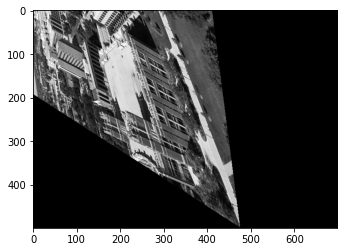

In [ ]:
from skimage.transform import warp, AffineTransform
transformation = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
nn_img = warp(img,transformation, order=2)
plt.imshow(nn_img,'gray')

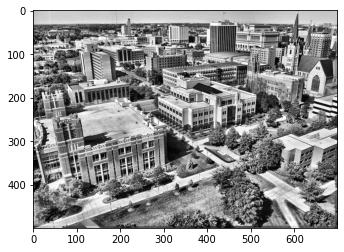

In [ ]:
from skimage.exposure import equalize_adapthist
clhae_img = equalize_adapthist(img, clip_limit=0.02)
plt.imshow(clhae_img, 'gray')
plt.show()

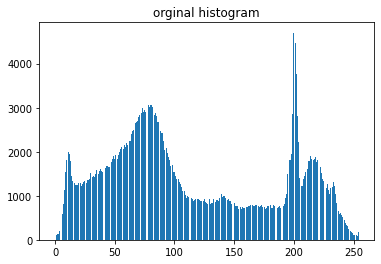

In [ ]:
orig_hist, orig_bins = np.histogram(img.ravel(), 255, [0,255])
plt.bar(orig_bins[:-1],orig_hist)
plt.title('orginal histogram')
plt.show()

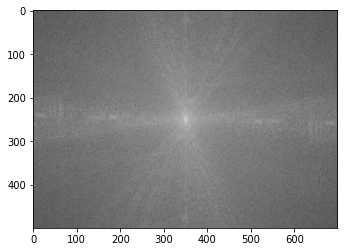

In [ ]:
import numpy as np
img_fft = np.fft.fft2(img)
mag_img = abs(np.fft.fftshift(img_fft))
mag_img = np.log(mag_img) # to make it visualization ( its black so image enhancement like log transformation)
mag_img = (mag_img/np.max(mag_img)*255).astype(int)
# black image so need transformation

plt.imshow(mag_img,'gray')
plt.show()

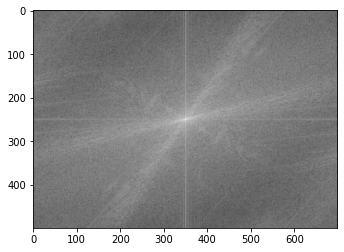

In [ ]:
import numpy as np
img_fft = np.fft.fft2(nn_img)
mag_img = abs(np.fft.fftshift(img_fft))
mag_img = np.log(mag_img)
mag_img = (mag_img/np.max(mag_img)*255).astype(int)
# black image so need transformation

plt.imshow(mag_img,'gray')
plt.show()

Calculate Fourrier trasnform


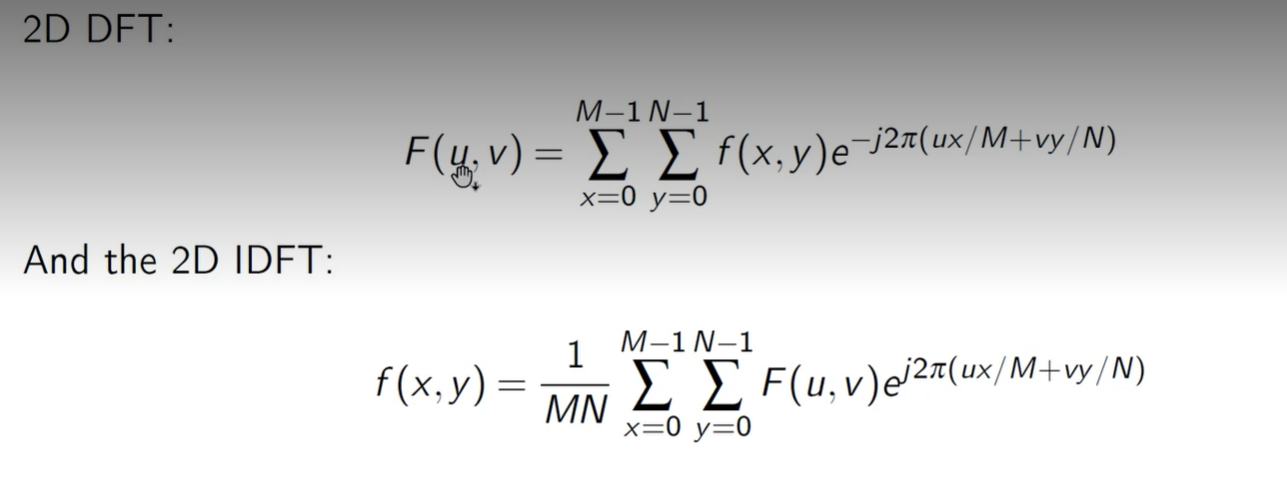

In [7]:
import numpy as np
# l = np.array([[112,201,169],[37,215,40],[87,19,132]])

I = (255 * np.random.rand(3,3)).round()
# I = np.random.rand(3,3)
print('input image = \n{}'.format(I))

dims = I.shape
L = dims[0]
K = dims[1]

If = np.zeros((L,K)).astype(complex)
x1 = np.arange(L)
y1 = np.arange(K)

[vv , uv] = np.meshgrid(x1,y1)

for x in x1:
  for y in y1:
    Iexp = np.exp(-1j*2*np.pi*(x*uv.astype(float)/L + y*vv.astype(float)/K))
    print('Iexp for x = {} and y = {} = \n{}'.format(x,y,Iexp))
    Itmp = I * Iexp
    print('Itmp for x = {} and y = {} = \n{}'.format(x,y,Itmp))
    If[x,y] = sum(Itmp.ravel())
    print('If[{},{}] = \n{}'.format(x,y,If[x,y]))
    input('press any key...')

In = np.abs(If)
print(In)

input image = 
[[118.  78.  52.]
 [ 49.  21. 195.]
 [191.  87.  78.]]
Iexp for x = 0 and y = 0 = 
[[1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j]]
Itmp for x = 0 and y = 0 = 
[[118.+0.j  78.+0.j  52.+0.j]
 [ 49.+0.j  21.+0.j 195.+0.j]
 [191.+0.j  87.+0.j  78.+0.j]]
If[0,0] = 
(869+0j)
press any key...
Iexp for x = 0 and y = 1 = 
[[ 1. +0.j        -0.5-0.8660254j -0.5+0.8660254j]
 [ 1. +0.j        -0.5-0.8660254j -0.5+0.8660254j]
 [ 1. +0.j        -0.5-0.8660254j -0.5+0.8660254j]]
Itmp for x = 0 and y = 1 = 
[[118.   +0.j         -39.  -67.5499815j  -26.  +45.033321j  ]
 [ 49.   +0.j         -10.5 -18.18653348j -97.5+168.87495374j]
 [191.   +0.j         -43.5 -75.34421013j -39.  +67.5499815j ]]
If[0,1] = 
(102.49999999999991+120.37753112603687j)
press any key...
Iexp for x = 0 and y = 2 = 
[[ 1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
 [ 1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
 [ 1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]]
Itmp for x = 0 and y =